In [1]:
from google.colab import files
uploaded = files.upload()

Saving forestfires.csv to forestfires.csv


#Import the Data

In [2]:
import pandas as pd
df = pd.read_csv("forestfires.csv")
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


#EDA

In [3]:
df.drop(["month","day"],axis=1,inplace = True)
df["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [4]:
df.isnull().sum()

FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [5]:
df.loc[df["size_category"]=='small','size_category']=0
df.loc[df["size_category"]=='large','size_category']=1
df["size_category"].value_counts()

0    378
1    139
Name: size_category, dtype: int64

#Seperating the X and Y

In [6]:
X = df.iloc[:,0:28]
Y = df.iloc[:,28]

#Standardization

In [7]:
from sklearn.preprocessing import StandardScaler
SS=StandardScaler()
X = SS.fit_transform(X)

In [8]:

import numpy as np
X = np.asarray(X).astype(np.float32)
Y = np.asarray(Y).astype(np.float32)

#Model Fitting

In [46]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
model = Sequential()
model.add(Dense(42, input_dim=28,  activation='relu')) #input layer
model.add(Dense(42, activation='linear'))
model.add(Dense(1, activation='sigmoid')) #output layer

#Metrics

In [47]:
model.compile(loss='hinge', optimizer='adam',metrics=['accuracy'])


In [48]:
history = model.fit(X, Y, validation_split=0.33, epochs=150, batch_size=8)

Epoch 1/150
44/44 [==============================] - 1s 6ms/step - loss: 1.1020 - accuracy: 0.7370 - val_loss: 1.0098 - val_accuracy: 0.6784
Epoch 2/150
44/44 [==============================] - 0s 4ms/step - loss: 1.0125 - accuracy: 0.7572 - val_loss: 1.0022 - val_accuracy: 0.6784
Epoch 3/150
44/44 [==============================] - 0s 3ms/step - loss: 1.0040 - accuracy: 0.7572 - val_loss: 1.0010 - val_accuracy: 0.6784
Epoch 4/150
44/44 [==============================] - 0s 3ms/step - loss: 1.0021 - accuracy: 0.7572 - val_loss: 1.0006 - val_accuracy: 0.6784
Epoch 5/150
44/44 [==============================] - 0s 4ms/step - loss: 1.0012 - accuracy: 0.7572 - val_loss: 1.0003 - val_accuracy: 0.6784
Epoch 6/150
44/44 [==============================] - 0s 4ms/step - loss: 1.0007 - accuracy: 0.7572 - val_loss: 1.0002 - val_accuracy: 0.6784
Epoch 7/150
44/44 [==============================] - 0s 4ms/step - loss: 1.0004 - accuracy: 0.7572 - val_loss: 1.0001 - val_accuracy: 0.6784
Epoch 8/150
4

#Model Accuracy Plot

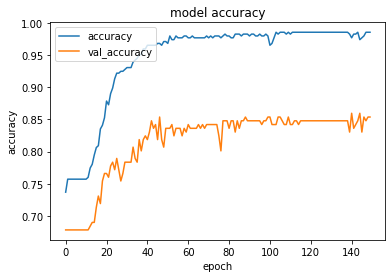

In [49]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'], loc='upper left')
plt.show()


#Model Loss Plot 

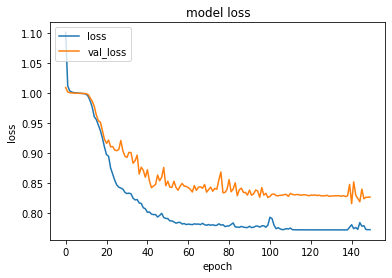

In [50]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper left')
plt.show()